In [60]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\patri\mtb_project_scrape.csv')

In [4]:
df.head()

,name_name,name_url,name_miles,name_miles_url,name_elevation_gain,name_elevation_gain_url,name_elevation_down,name_elevation_down_url,name_location,name_location_url,name_level,name_level_url
0,The Whole Enchilada,https://www.mtbproject.com/trail/4670265/the-w...,34.1 mi,https://www.mtbproject.com/trail/4670265/the-w...,"1,283' Up",https://www.mtbproject.com/trail/4670265/the-w...,"7,794' Down",https://www.mtbproject.com/trail/4670265/the-w...,"Moab, UT",https://www.mtbproject.com/trail/4670265/the-w...,Difficult,https://www.mtbproject.com/trail/4670265/the-w...
1,Gooseberry Mesa - The Big Loop,https://www.mtbproject.com/trail/4183760/goose...,13.1 mi,https://www.mtbproject.com/trail/4183760/goose...,554' Up,https://www.mtbproject.com/trail/4183760/goose...,553' Down,https://www.mtbproject.com/trail/4183760/goose...,"Hurricane, UT",https://www.mtbproject.com/trail/4183760/goose...,Difficult,https://www.mtbproject.com/trail/4183760/goose...
2,Little Scraggy Trail Loop,https://www.mtbproject.com/trail/7015764/littl...,12.6 mi,https://www.mtbproject.com/trail/7015764/littl...,"1,432' Up",https://www.mtbproject.com/trail/7015764/littl...,"1,443' Down",https://www.mtbproject.com/trail/7015764/littl...,"Pine, CO",https://www.mtbproject.com/trail/7015764/littl...,Intermediate/Difficult,https://www.mtbproject.com/trail/7015764/littl...
3,Monarch Crest - IMBA EPIC,https://www.mtbproject.com/trail/3671983/monar...,36.2 mi,https://www.mtbproject.com/trail/3671983/monar...,"2,035' Up",https://www.mtbproject.com/trail/3671983/monar...,"5,890' Down",https://www.mtbproject.com/trail/3671983/monar...,"Whitepine, CO",https://www.mtbproject.com/trail/3671983/monar...,Difficult,https://www.mtbproject.com/trail/3671983/monar...
4,Porcupine Rim,https://www.mtbproject.com/trail/157369/porcup...,14.7 mi,https://www.mtbproject.com/trail/157369/porcup...,"1,195' Up",https://www.mtbproject.com/trail/157369/porcup...,"2,962' Down",https://www.mtbproject.com/trail/157369/porcup...,"Moab, UT",https://www.mtbproject.com/trail/157369/porcup...,Difficult,https://www.mtbproject.com/trail/157369/porcup...


In [5]:
df.columns

Index(['name_name', 'name_url', 'name_miles', 'name_miles_url',
       'name_elevation_gain', 'name_elevation_gain_url', 'name_elevation_down',
       'name_elevation_down_url', 'name_location', 'name_location_url',
       'name_level', 'name_level_url'],
      dtype='object')

In [9]:
data = df.drop(columns=['name_url', 'name_miles_url', 'name_elevation_gain_url', 'name_elevation_down_url', 'name_location_url','name_level_url'])

In [10]:
data.head()

,name_name,name_miles,name_elevation_gain,name_elevation_down,name_location,name_level
0,The Whole Enchilada,34.1 mi,"1,283' Up","7,794' Down","Moab, UT",Difficult
1,Gooseberry Mesa - The Big Loop,13.1 mi,554' Up,553' Down,"Hurricane, UT",Difficult
2,Little Scraggy Trail Loop,12.6 mi,"1,432' Up","1,443' Down","Pine, CO",Intermediate/Difficult
3,Monarch Crest - IMBA EPIC,36.2 mi,"2,035' Up","5,890' Down","Whitepine, CO",Difficult
4,Porcupine Rim,14.7 mi,"1,195' Up","2,962' Down","Moab, UT",Difficult


In [11]:
data.shape

(300, 6)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name_name            300 non-null    object
 1   name_miles           300 non-null    object
 2   name_elevation_gain  300 non-null    object
 3   name_elevation_down  300 non-null    object
 4   name_location        300 non-null    object
 5   name_level           300 non-null    object
dtypes: object(6)
memory usage: 14.2+ KB


In [15]:
mtb = data.rename(columns = {'name_name':'trail_name','name_miles':'trail_length',
                             'name_elevation_gain':'trail_gain_elevation','name_elevation_gain':'trail_drop_elevation',
                             'name_location':'trail_location','name_level':'trail_skill_level'})

In [16]:
mtb.head()

,trail_name,trail_length,trail_drop_elevation,name_elevation_down,trail_location,trail_skill_level
0,The Whole Enchilada,34.1 mi,"1,283' Up","7,794' Down","Moab, UT",Difficult
1,Gooseberry Mesa - The Big Loop,13.1 mi,554' Up,553' Down,"Hurricane, UT",Difficult
2,Little Scraggy Trail Loop,12.6 mi,"1,432' Up","1,443' Down","Pine, CO",Intermediate/Difficult
3,Monarch Crest - IMBA EPIC,36.2 mi,"2,035' Up","5,890' Down","Whitepine, CO",Difficult
4,Porcupine Rim,14.7 mi,"1,195' Up","2,962' Down","Moab, UT",Difficult


In [18]:
mtb[['trail_city','trail_state']] = mtb.trail_location.str.split(',',expand=True)

In [19]:
mtb.head()

,trail_name,trail_length,trail_drop_elevation,name_elevation_down,trail_location,trail_skill_level,trail_city,trail_state
0,The Whole Enchilada,34.1 mi,"1,283' Up","7,794' Down","Moab, UT",Difficult,Moab,UT
1,Gooseberry Mesa - The Big Loop,13.1 mi,554' Up,553' Down,"Hurricane, UT",Difficult,Hurricane,UT
2,Little Scraggy Trail Loop,12.6 mi,"1,432' Up","1,443' Down","Pine, CO",Intermediate/Difficult,Pine,CO
3,Monarch Crest - IMBA EPIC,36.2 mi,"2,035' Up","5,890' Down","Whitepine, CO",Difficult,Whitepine,CO
4,Porcupine Rim,14.7 mi,"1,195' Up","2,962' Down","Moab, UT",Difficult,Moab,UT


In [28]:
mtb['trail_length'] = mtb['trail_length'].map(lambda x: x.lstrip('').rstrip('mi'))

In [40]:
mtb['trail_drop_elevation'] = mtb['trail_drop_elevation'].str.replace("'","")

In [42]:
mtb['trail_drop_elevation'] = mtb['trail_drop_elevation'].str.replace(",","")

In [44]:
mtb['trail_drop_elevation'] = mtb['trail_drop_elevation'].str.replace("Up","")

In [46]:
mtb['name_elevation_down'] = mtb['name_elevation_down'].str.replace("' Down","")

In [48]:
mtb['name_elevation_down'] = mtb['name_elevation_down'].str.replace(",","")

In [51]:
mtb.head(15)

,trail_name,trail_length,trail_drop_elevation,name_elevation_down,trail_location,trail_skill_level,trail_city,trail_state
0,The Whole Enchilada,34.1,1283,7794,"Moab, UT",Difficult,Moab,UT
1,Gooseberry Mesa - The Big Loop,13.1,554,553,"Hurricane, UT",Difficult,Hurricane,UT
2,Little Scraggy Trail Loop,12.6,1432,1443,"Pine, CO",Intermediate/Difficult,Pine,CO
3,Monarch Crest - IMBA EPIC,36.2,2035,5890,"Whitepine, CO",Difficult,Whitepine,CO
4,Porcupine Rim,14.7,1195,2962,"Moab, UT",Difficult,Moab,UT
5,Camp Tamarancho Loop,10.8,1407,1406,"Fairfax, CA",Difficult,Fairfax,CA
6,Phil's World,26.8,2059,2061,"Cortez, CO",Intermediate,Cortez,CO
7,Navajo Rocks Loop,17.5,1342,1336,"Moab, UT",Intermediate/Difficult,Moab,UT
8,401 Trail Loop,14.1,2249,2222,"Crested…, CO",Intermediate/Difficult,Crested…,CO
9,White Rim Trail,100.8,5656,5636,"Moab, UT",Intermediate,Moab,UT


In [52]:
mtb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   trail_name            300 non-null    object
 1   trail_length          300 non-null    object
 2   trail_drop_elevation  300 non-null    object
 3   name_elevation_down   300 non-null    object
 4   trail_location        300 non-null    object
 5   trail_skill_level     300 non-null    object
 6   trail_city            300 non-null    object
 7   trail_state           300 non-null    object
dtypes: object(8)
memory usage: 18.9+ KB


In [53]:
mtb = mtb.rename(columns = {'name_elevation_down':'trail_elevation_gain'})

In [54]:
mtb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   trail_name            300 non-null    object
 1   trail_length          300 non-null    object
 2   trail_drop_elevation  300 non-null    object
 3   trail_elevation_gain  300 non-null    object
 4   trail_location        300 non-null    object
 5   trail_skill_level     300 non-null    object
 6   trail_city            300 non-null    object
 7   trail_state           300 non-null    object
dtypes: object(8)
memory usage: 18.9+ KB


In [55]:
mtb = mtb.astype({"trail_length":'float64', "trail_drop_elevation":'int64',"trail_elevation_gain":'int64'}) 
mtb.dtypes

trail_name               object
trail_length            float64
trail_drop_elevation      int64
trail_elevation_gain      int64
trail_location           object
trail_skill_level        object
trail_city               object
trail_state              object
dtype: object

In [56]:
mtb.isnull().sum()

trail_name              0
trail_length            0
trail_drop_elevation    0
trail_elevation_gain    0
trail_location          0
trail_skill_level       0
trail_city              0
trail_state             0
dtype: int64

Text(0, 0.5, 'Number of Trails')

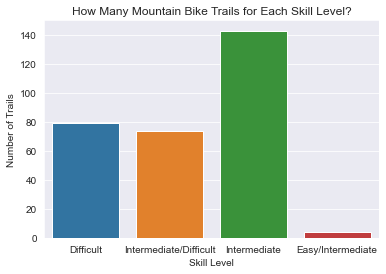

In [61]:
sns.set_style('darkgrid')

sns.countplot(data=mtb,x='trail_skill_level')

plt.title('How Many Mountain Bike Trails for Each Skill Level?')
plt.xlabel('Skill Level')
plt.ylabel('Number of Trails')

plt.show()